<a href="https://colab.research.google.com/github/Naliaka/100daysofcode-part-1/blob/master/Monthly_Sales_Predictive_Forecast_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2:Monthly Sales Forecast 

Predictive forecast of where the month will end of sales continue with the stated trajectory.

# Install and import libraries


In [0]:
!pip install xlrd
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install pandas-profiling
!pip install plotly
!pip install geopandas
!pip install geocoder
!pip install pysal
!pip install descartes
!pip install fbprophet
!pip install pystan


# setup



In [0]:
import warnings
warnings.filterwarnings('ignore')
# Common libs
import pandas as pd
import os
import numpy as np
from datetime import datetime, date, timedelta
import math
import xlrd
from google.colab import files
# View more columns in output of Panda Dataframes
pd.set_option('display.max_columns', 4000)
from fbprophet.plot import plot_yearly
from fbprophet.plot import add_changepoints_to_plot
# Setup Matlab for plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Timeseries
from fbprophet import Prophet

from pandas.plotting import scatter_matrix
import requests

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
 print('User uploaded file "{name}" with length {length} bytes'.format(
 name=fn, length=len(uploaded[fn])))

Saving monthlysalesForecast2019.xlsx to monthlysalesForecast2019 (1).xlsx
User uploaded file "monthlysalesForecast2019.xlsx" with length 14962 bytes



# Upload files and save as data frame

In [0]:
sales = pd.read_excel('monthlysalesForecast2019.xlsx')
sales.head(1000)

,Month,Totalsales
0,2018-07-01,1893950
1,2018-08-01,3035000
2,2018-09-01,5775040
3,2018-10-01,12238750
4,2018-11-01,13454210
5,2018-12-01,19140950
6,2019-01-01,28694150
7,2019-02-01,101465290
8,2019-03-01,101777620
9,2019-04-01,180602743


In [0]:
print(sales.tail())

        Month  Totalsales
10 2019-05-01   230094780
11 2019-06-01   224084396
12 2019-07-01   195739081
13 2019-08-01   367513318
14 2019-09-01  1011782806


In [0]:
sales['cumsum'] = sales['Totalsales'].cumsum()
print(sales.tail())

        Month  Totalsales      cumsum
10 2019-05-01   230094780   698172483
11 2019-06-01   224084396   922256879
12 2019-07-01   195739081  1117995960
13 2019-08-01   367513318  1485509278
14 2019-09-01  1011782806  2497292084


From above results it noted that the Total Sales amount since May to september is Ts2,497,292,084

In [0]:
sales = sales[['Month', 'cumsum']]
sales.columns = ['ds', 'y']
print(sales.head())

          ds         y
0 2018-07-01   1893950
1 2018-08-01   4928950
2 2018-09-01  10703990
3 2018-10-01  22942740
4 2018-11-01  36396950


In [0]:
#Instantiate an instance of the Prophet class and fit it into the sales data
m = Prophet(daily_seasonality=False)
m.fit(sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [0]:
future = m.make_future_dataframe(periods=30)
print(future.tail())

           ds
40 2019-09-27
41 2019-09-28
42 2019-09-29
43 2019-09-30
44 2019-10-01


In [0]:
forecast = m.predict(future)

In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
40,2019-09-27,1.607522e+09,1.157429e+09,2.050077e+09
41,2019-09-28,1.612043e+09,1.149845e+09,2.095311e+09
42,2019-09-29,1.616563e+09,1.161824e+09,2.094754e+09
43,2019-09-30,1.621083e+09,1.156055e+09,2.077000e+09
44,2019-10-01,1.625604e+09,1.174631e+09,2.083111e+09


We can see that  total sales meant for oct is cumulative total of Tsh 1.625604e+09 on sarafu.

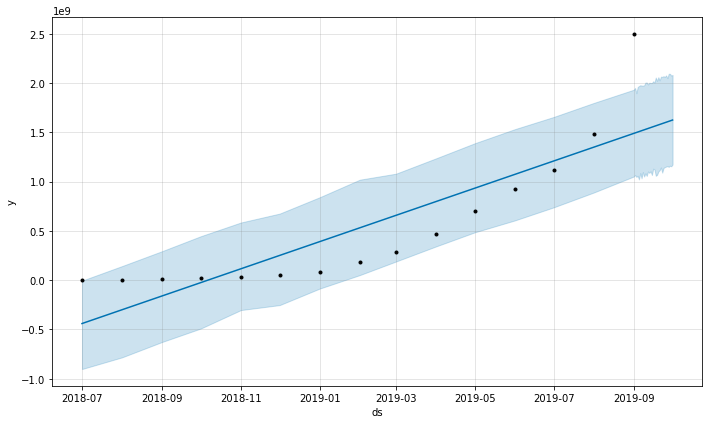

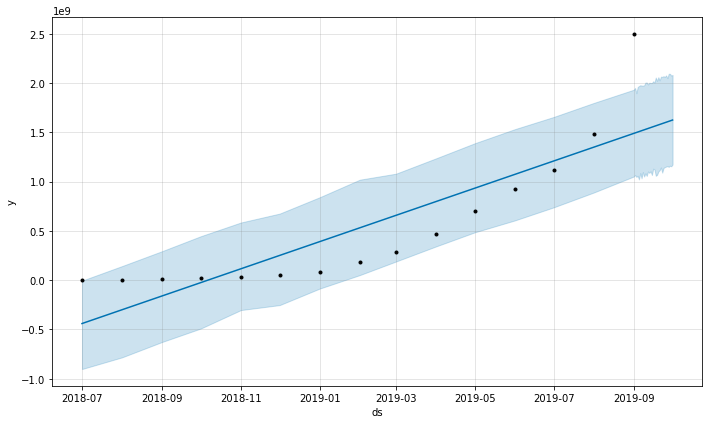

In [0]:
m.plot(forecast)

In [0]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

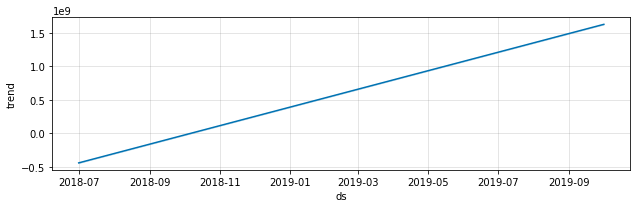

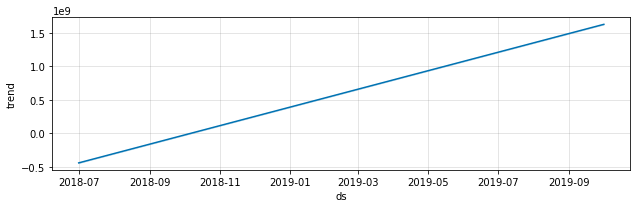

In [0]:
m.plot_components(forecast)

In [0]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2019-06-06', '2019-04-04', '2019-04-22',
                        '2019-04-26', '2019-04-22', '2019-08-08',
                        '2018-08-08', '2019-10-14','2019-06-07', 
                        '2018-12-24', '2019-12-25','2018-12-25']),
                        
  
                        
  'lower_window': 0,
  'upper_window': 1,
})
Eid = pd.DataFrame({
  'holiday': 'Eid al-Fitr',
  'ds': pd.to_datetime(['2019-06-07', '2019-06-06','2019-06-05']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, Eid))



In [0]:
m = Prophet(holidays=holidays)
forecast = m.fit(sales).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [0]:
forecast[(forecast['playoff'] + forecast['Eid al-Fitr']).abs() > 0][
        ['ds', 'playoff', 'Eid al-Fitr']][-10:]

,ds,playoff,Eid al-Fitr


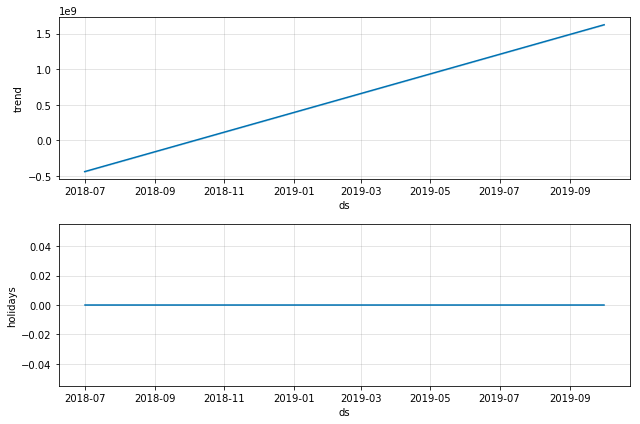

In [0]:
fig = m.plot_components(forecast)

In [0]:
df= pd.DataFrame(sales,columns=["Month","Totalsales"],)
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [0]:
df = df[df.Totalsales > 100]

In [0]:
df = df[df.Totalsales > df.Totalsales.quantile(0.0001)]

In [0]:
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
df["time_for_prophet"] = df.index # hack ... can't use index
model.fit(sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [0]:
future = model.make_future_dataframe(periods=30)
print(future.tail())

           ds
40 2019-09-27
41 2019-09-28
42 2019-09-29
43 2019-09-30
44 2019-10-01


In [0]:
forecast = model.predict(future)

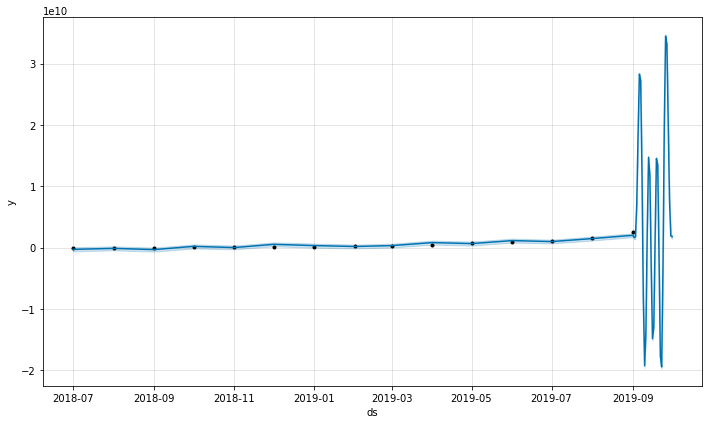

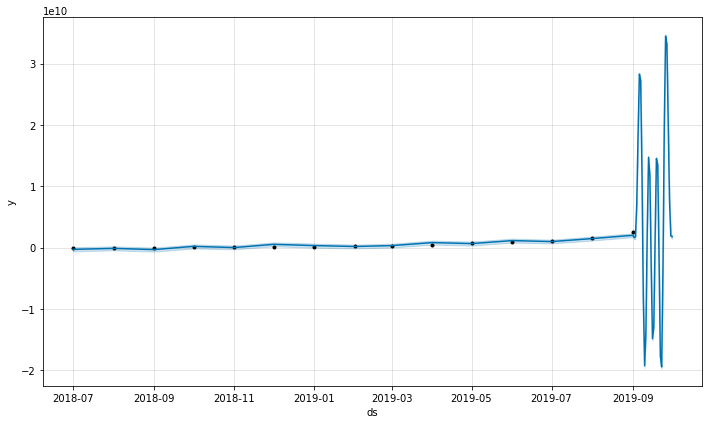

In [0]:
model.plot(forecast)

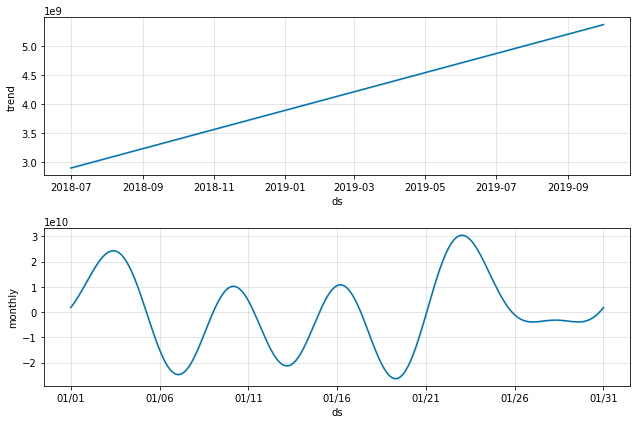

In [0]:
model.plot_components(forecast);

In [0]:
md=Prophet(interval_width=0.95) # by default is 80%
df["time_for_prophet"] = df.index # hack ... can't use index
md.fit(sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


In [0]:
# prepare the required dataframe
 prophet_df.rename(columns={'index':'ds','Close':'y'},inplace=True)
 prophet_df = prophet_df[['ds','y']]

In [0]:
print(sales.shape[0], 'rows', 'AND', sales.shape[1],'columns')
print('Min Date:',sales.Month.min(),'AND','Max Date:',sales.Month.max())
# print 5 rows at the beginning
sales.head()

15 rows AND 2 columns
Min Date: 2018-07-01 00:00:00 AND Max Date: 2019-09-01 00:00:00


,Month,Totalsales
0,2018-07-01,1893950
1,2018-08-01,3035000
2,2018-09-01,5775040
3,2018-10-01,12238750
4,2018-11-01,13454210


Above Data set contains a year revenew amount from 2018-07-01 to 2019-09-01. There are 46121 rows and two columns( date and Totalsales) in the data frame.

# missing value

In [0]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Month         15 non-null datetime64[ns]
Totalsales    15 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 320.0 bytes


Above date set show no missing values

In [0]:
df= pd.DataFrame(sales,columns=["Month","Totalsales"],)
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")



In [0]:
df = df[df.Totalsales > 100]


In [0]:
df = df[df.Totalsales > df.Totalsales.quantile(0.0001)]

In [0]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
df["time_for_prophet"] = df.index # hack ... can't use index
m.fit(df.rename(columns={"time_for_prophet": "ds","Totalsales": "y"}))

# Time-series data

Text(0, 0.5, 'Totalsales')

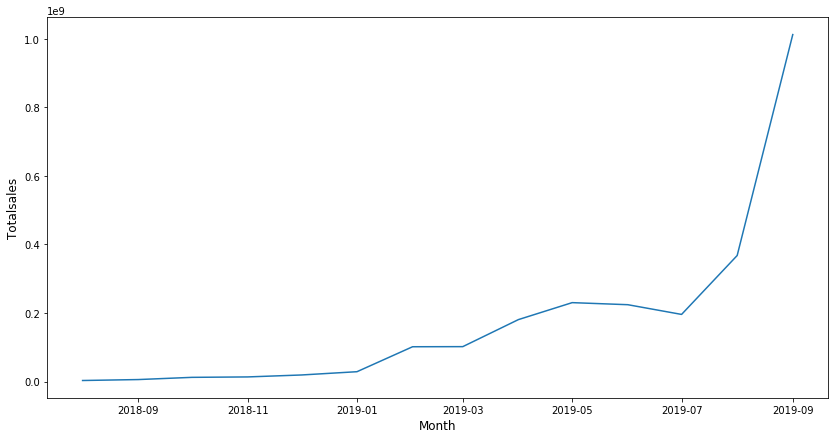

In [0]:
plt.figure(figsize=(14,7))
plt.plot(df.index.values, df[df.columns[0]].values)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Totalsales', fontsize=12)


# Time Series Modeling with Prophet

In [0]:

model= Prophet(holidays=holidays)
df["time_for_prophet"] = df.index # hack ... can't use index
model.fit(df.rename(columns={"time_for_prophet": "ds","Totalsales": "y"}))


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.


In [0]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
df["time_for_prophet"] = df.index # hack ... can't use index
m.fit(df.rename(columns={"time_for_prophet": "ds","Totalsales": "y"}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.


In [0]:
md=Prophet(interval_width=0.95) # by default is 80%
df["time_for_prophet"] = df.index # hack ... can't use index
md.fit(sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.


# Making a forecast

[link text](https:// [link text](https:// [link text](https://))) Two weeks sales  forecast


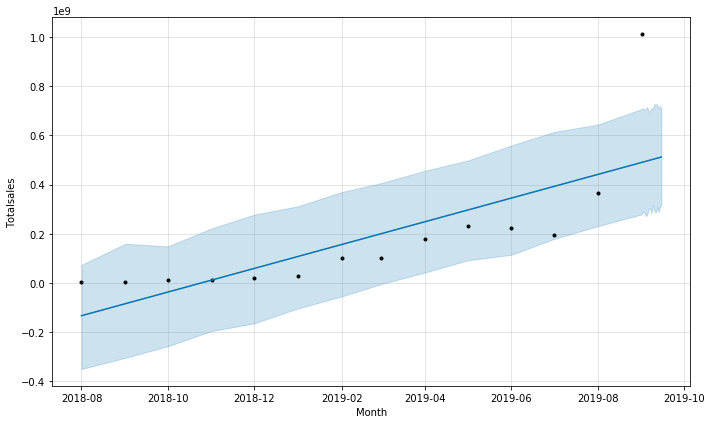

In [0]:
model.plot(forecast, xlabel="Month", ylabel="Totalsales");

Four weeks sales forecast

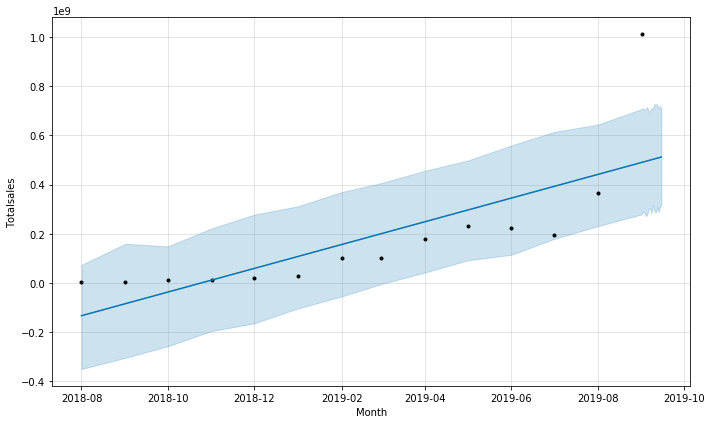

In [0]:
m.plot(forecast, xlabel="Month", ylabel="Totalsales");

In [0]:
df_forecast = m.make_future_dataframe(periods=30, freq="D")
forecast = m.predict(df_forecast)

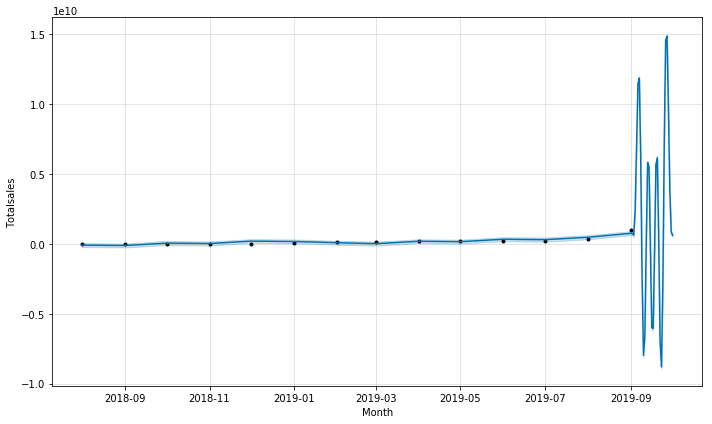

In [0]:
m.plot(forecast, xlabel="Month", ylabel="Totalsales");

In [0]:
f_forecast = md.make_future_dataframe(periods=30, freq="D")
forecast = md.predict(df_forecast)

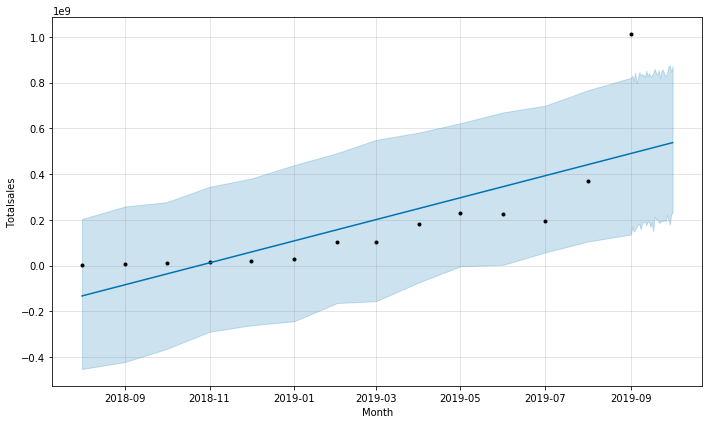

In [0]:
md.plot(forecast, xlabel="Month", ylabel="Totalsales");

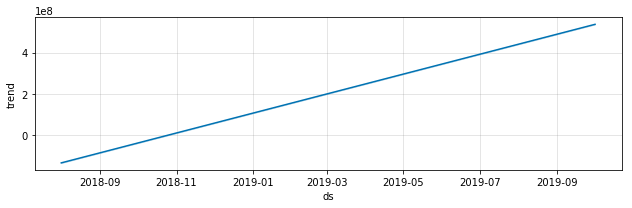

In [0]:
m.plot_components(forecast);

In [0]:
df_forecast = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict(df_forecast)

In [0]:
model.plot(forecast, xlabel="Month", ylabel="Totalsales");

# Trend Visualization

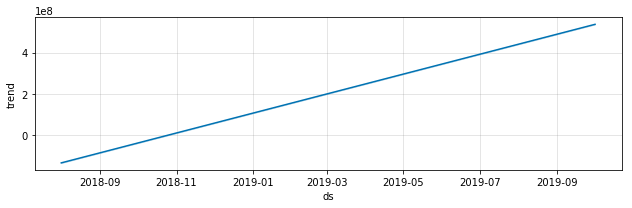

In [0]:
model.plot_components(forecast);

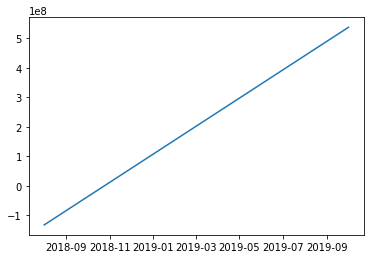

In [0]:
plt.plot(forecast.ds, forecast.trend)

In [0]:
m= Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
df["time_for_prophet"] = df.index # hack ... can't use index
m.fit(df.rename(columns={"time_for_prophet": "ds","Totalsales": "y"}))


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.


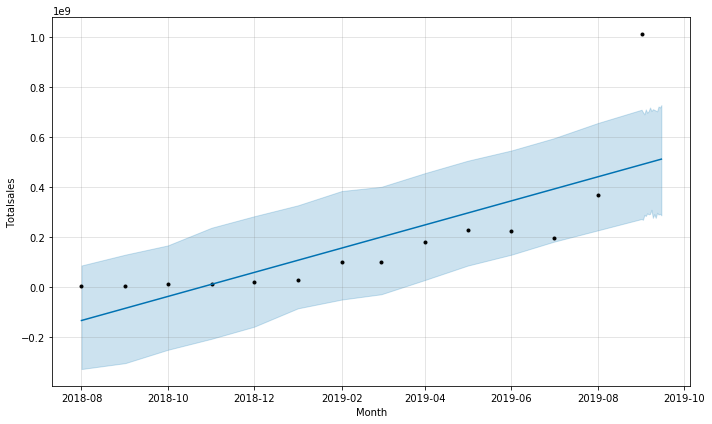

In [0]:
df_forecast = model.make_future_dataframe(periods=14, freq="D")
forecast = model.predict(df_forecast)
m.plot(forecast, xlabel="Month", ylabel="Totalsales");

In [0]:
from fbprophet.plot import add_changepoints_to_plot
forecast = model.predict(df_forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


NameError: ignored

In [0]:
m.plot_components(forecast);